In [6]:
from __future__ import (absolute_import,division,print_function,unicode_literals)

import datetime
import os.path
import sys

import pandas as pd
import backtrader as bt

In [4]:
# get data from qs
import qstock as qs
# df = qs.get_data('中证消费', start='2022-06-01',end='2022-10-20', timeouts=200)
df=qs.get_data('沪深300', timeouts=200)
df.head()


100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


,name,code,open,high,low,close,volume,turnover,turnover_rate
date,,,,,,,,,
2005-01-04,沪深300,000300,994.77,994.77,980.66,982.79,7412868,4.431977e+09,0.03
2005-01-05,沪深300,000300,981.58,997.32,979.88,992.56,7119108,4.529208e+09,0.02
2005-01-06,沪深300,000300,993.33,993.79,980.33,983.17,6288029,3.921015e+09,0.02
2005-01-07,沪深300,000300,983.05,995.71,979.81,983.96,7298694,4.737469e+09,0.03
2005-01-10,沪深300,000300,983.76,993.96,979.79,993.88,5791697,3.762933e+09,0.02


# 创建策略类：双均线策略

In [8]:
class TwoSmaStrategy(bt.Strategy):
    params = (('short', 5), ('long', 10))  # 可调整的参数

    def __init__(self):
        self.order = None  # 初始化订单
        self.sma_s = bt.indicators.MovingAverageSimple(self.datas[0].lines.close, period=self.params.short)  # 短期均线指标
        self.sma_l = bt.indicators.MovingAverageSimple(self.datas[0].lines.close, period=self.params.long)  # 长期均线指标

    # 策略方法
    def next(self):
        # 检查是否已经买入
        if not self.position:
            # 如果没有买入，并且短期均线 > 长期均线，说明涨势，买入
            if self.sma_s[0] > self.sma_l[0]:
                self.order = self.buy()
                print(f'buy at')
        else:
            # 已经买了，并且短期均线 < 长期均线，说明跌势，卖出
            if self.sma_s[0] < self.sma_l[0]:
                self.order = self.sell()

In [15]:
cerebro = bt.Cerebro() # 初始化

cerebro.addstrategy(TwoSmaStrategy, long=10)

datafeed = bt.feeds.PandasData(dataname = df) # 必须将df数据转换为btfeed格式
cerebro.adddata(datafeed)

cerebro.broker.setcash(10000000.0) #设置策略初始资金，默认是10000

print('组合初始资产价值：%.2f' % cerebro.broker.getvalue())

cerebro.run()

print('组合最终资产价值：%.2f' % cerebro.broker.getvalue())

cerebro.plot(style='bar')

组合初始资产价值：10000000.00
组合最终资产价值：10002136.49


<IPython.core.display.Javascript object>

[[<Figure size 1500x1200 with 4 Axes>]]

<IPython.core.display.Javascript object>

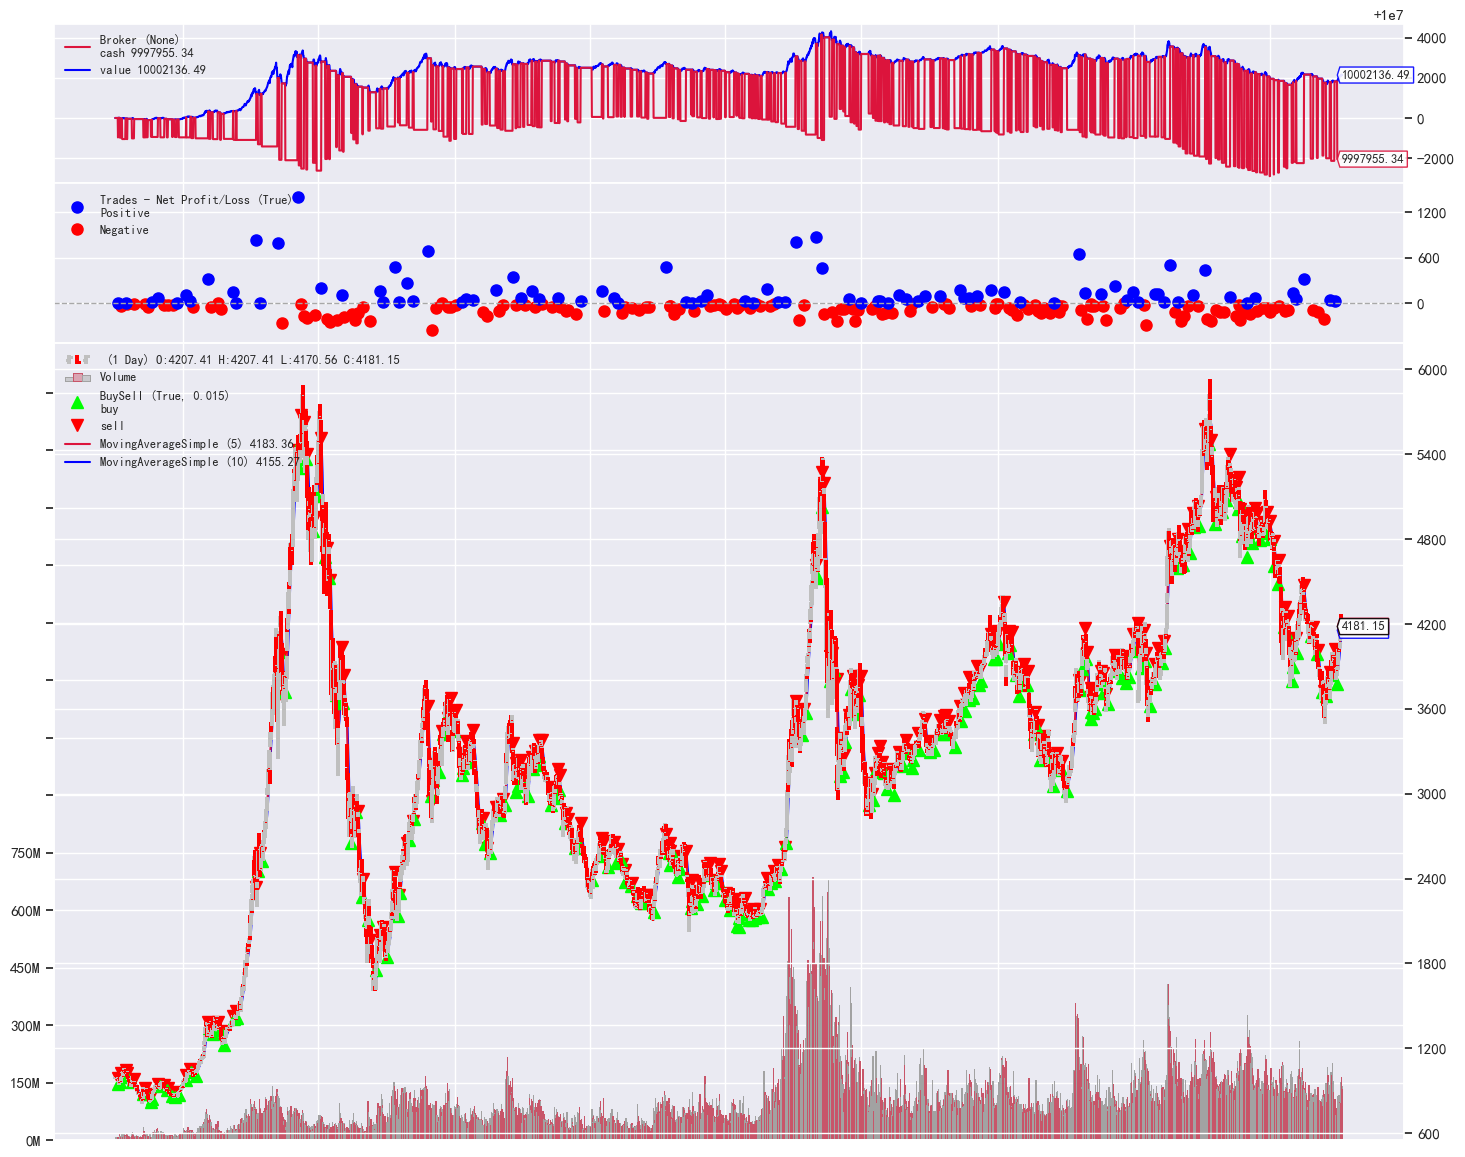

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(style='bar', iplot = True)[0][0]